In [1]:
import pandas as pd
import warnings
df=pd.read_csv('C:/Users/Admin/Downloads/HousingDataset.csv')
df.drop(columns=['lusury_pack', 'area'], inplace=True)

df1 = pd.read_csv('C:/Users/Admin/Downloads/Housing.csv')
df['raw_price'] = df1['price']

In [2]:
df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,...,total_rooms,area_per_room,log_area_per_room,rooms_to_story_ratio,fully_featured,no_parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,raw_price
0,4,2,3,1,0,0,0,1,2,1,...,6,1236.666667,1.485345,2.0,0,0,1,0,0,13300000
1,4,4,4,1,0,0,0,1,3,0,...,8,1120.000000,1.137580,2.0,0,0,1,0,0,12250000
2,3,2,2,1,0,1,0,0,2,1,...,5,1992.000000,1.841287,2.5,0,0,0,1,0,12250000
3,4,2,2,1,0,1,0,1,3,1,...,6,1250.000000,1.487132,3.0,0,0,1,0,0,12215000
4,4,1,2,1,1,1,0,1,2,0,...,5,1484.000000,1.782414,2.5,1,0,1,0,0,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,1,0,1,0,0,2,0,...,3,1000.000000,2.668900,3.0,0,0,0,0,1,1820000
541,3,1,1,0,0,0,0,0,0,0,...,4,600.000000,1.945910,4.0,0,1,0,1,0,1767150
542,2,1,1,1,0,0,0,0,0,0,...,3,1206.666667,2.731502,3.0,0,1,0,0,1,1750000
543,3,1,1,0,0,0,0,0,0,0,...,4,727.500000,1.994063,4.0,0,1,1,0,0,1750000


In [3]:
x = df[['bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
        'airconditioning', 'parking', 'prefarea', 'fully_featured', 'no_parking', 
        'furnishingstatus_furnished', 'furnishingstatus_unfurnished']]

#We will test both (logged and original) for a fair estimate of the model's accuracy
y_log = df['log_price']
y_raw = df['raw_price'] 

######### Just testing accuracy without any splitted data with Linear Regression#########

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
LR = LinearRegression().fit(x, y_log)

In [6]:
metrics.r2_score(y_log, LR.predict(x))

0.6351359845204186

In [7]:
LR = LinearRegression().fit(x, y_raw)

In [8]:
metrics.r2_score(y_raw, LR.predict(x))

0.6233329039954201

######### Let's test it with splitted data into train and test #########

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_log_train, y_log_test = train_test_split(x, y_log, test_size=0.3, random_state=1)

In [11]:
LR = LinearRegression().fit(x_train, y_log_train)

In [12]:
y_log_pred = LR.predict(x_test)

In [13]:
metrics.r2_score(y_log_test, y_log_pred)

0.6051790219099021

######## Ridge & Lasso on splitted data with Log Target #########

In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
ridge=Ridge(alpha=0.1).fit(x_train, y_log_train)
lasso=Lasso(alpha=0.001).fit(x_train, y_log_train)

In [16]:
print("Ridge R2:", metrics.r2_score(y_log_test, ridge.predict(x_test)))
print("Lasso R2:", metrics.r2_score(y_log_test, lasso.predict(x_test)))

Ridge R2: 0.6051657742346153
Lasso R2: 0.6039314398129474


######### Linear Regresson on Raw Target with train test split ##########

In [17]:
x_train, x_test, y_raw_train, y_raw_test = train_test_split(x, y_raw, test_size=0.3, random_state=1)

In [18]:
LR = LinearRegression().fit(x_train, y_raw_train)

In [19]:
LR = LinearRegression().fit(x_train, y_raw_train)

In [20]:
y_pred = LR.predict(x_test)

In [21]:
metrics.r2_score(y_raw_test, y_pred)

0.6200486232913811

######### Ridge & Lasso on splitted data with Raw Target ########

In [22]:
from sklearn.linear_model import Lasso, Ridge

In [23]:
ridge=Ridge(alpha=0.1).fit(x_train, y_raw_train)
lasso=Lasso(alpha=0.001).fit(x_train, y_raw_train)

In [24]:
print("Ridge R2:", metrics.r2_score(y_raw_test, ridge.predict(x_test)))
print("Lasso R2:", metrics.r2_score(y_raw_test, lasso.predict(x_test)))

Ridge R2: 0.6200192422985049
Lasso R2: 0.6200486230323079


######### Linear Regresson with Polynomial Features ##########

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
LR = LinearRegression()
degree=4

In [26]:
import numpy as np
for i in np.arange(1, degree):
    model = make_pipeline(PolynomialFeatures(i), LR).fit(x, y_log)
    print(f'\n R2 for degree {i}:', metrics.r2_score(y_log, model.predict(x)))


 R2 for degree 1: 0.6351359845204186

 R2 for degree 2: 0.7052763947503755

 R2 for degree 3: 0.8237148831412311


In [27]:
import numpy as np
for i in np.arange(1, degree):
    model = make_pipeline(PolynomialFeatures(i), LR).fit(x, y_raw)
    print(f'\n R2 for degree {i}:', metrics.r2_score(y_log, model.predict(x)))


 R2 for degree 1: -180092797515187.0

 R2 for degree 2: -182633170892556.44

 R2 for degree 3: -186397509031107.94


In [28]:
for i in np.arange(1, degree):
    model = make_pipeline(PolynomialFeatures(i), LR).fit(x_train, y_log_train)
    print(f'\n R2 for degree {i}:', metrics.r2_score(y_log_test, model.predict(x_test)))


 R2 for degree 1: 0.6051790219099018

 R2 for degree 2: 0.5063578309703032

 R2 for degree 3: -1.1224998582512701e+18


In [29]:
for i in np.arange(1, degree):
    model = make_pipeline(PolynomialFeatures(i), LR).fit(x_train, y_raw_train)
    print(f'\n R2 for degree {i}:', metrics.r2_score(y_raw_test, model.predict(x_test)))


 R2 for degree 1: 0.6200486232913811

 R2 for degree 2: 0.5518746517671259

 R2 for degree 3: -2819218877416725.0


########## Polynomial Features with Ridge ############

In [30]:
for i in range(1, 4):
    model = make_pipeline(PolynomialFeatures(i), Ridge(alpha=1.0)).fit(x_train, y_log_train)
    print(f"R2 for Degree {i}:", metrics.r2_score(y_log_test, model.predict(x_test)))

R2 for Degree 1: 0.6049969884524937
R2 for Degree 2: 0.5708440702124614
R2 for Degree 3: 0.35169729485119394


In [31]:
for i in range(1, 4):
    model = make_pipeline(PolynomialFeatures(i), Ridge(alpha=1.0)).fit(x_train, y_raw_train)
    print(f"R2 for Degree {i}:", metrics.r2_score(y_raw_test, model.predict(x_test)))

R2 for Degree 1: 0.6196682953635265
R2 for Degree 2: 0.62496960554533
R2 for Degree 3: 0.3764975291207996


########### XGBoost Regressor ###########

In [32]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor(n_estimators=200, max_depth=2, learning_rate=0.2, random_state=1)
model.fit(x, y_raw)
y_pred = model.predict(x)
metrics.r2_score(y_raw, y_pred)

0.7163565158843994

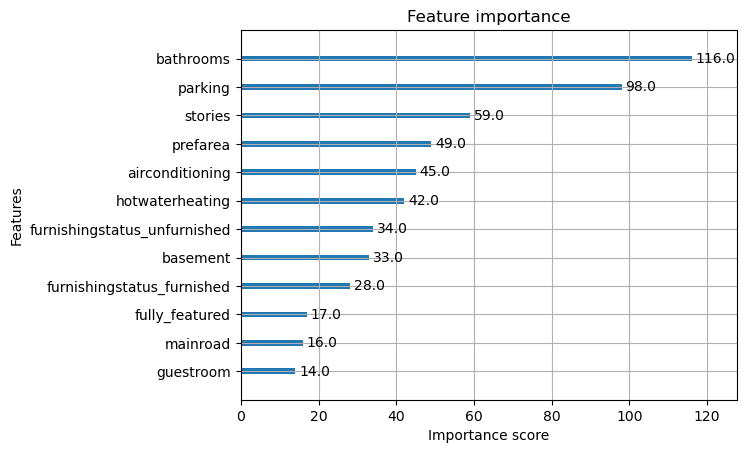

In [33]:
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

In [34]:
import xgboost as xgb

In [35]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, random_state=1)
xgb_model.fit(x_train, y_raw_train)
y_raw_pred = xgb_model.predict(x_test)

In [36]:
print('XGBoost R2 (Test):', metrics.r2_score(y_raw_test, y_raw_pred))

XGBoost R2 (Test): 0.5913385152816772


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

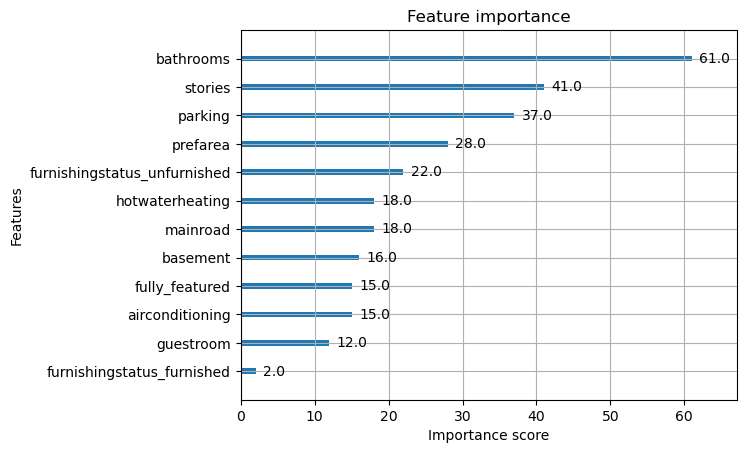

In [37]:
plot_importance(xgb_model)

############ Decision Tree Regressor ##########

In [38]:
from sklearn import tree
DT = tree.DecisionTreeRegressor(random_state=1)

In [39]:
DT.fit(x, y_raw)
metrics.r2_score(y_raw, DT.predict(x))

0.9127031705197315

In [81]:
xgb_model.fit(x_train, y_raw_train)
y_raw_pred = xgb_model.predict(x_test)
print('XGB R2 (Test):', metrics.r2_score(y_raw_test, y_raw_pred))

XGB R2 (Test): 0.6607273817062378


In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
model = SVR(kernel='rbf', C=100, epsilon=0.2, gamma='scale')
model.fit(x_scaled, y_log)

SVR(C=100, epsilon=0.2)

In [42]:
metrics.r2_score(y_log, model.predict(x_scaled))

0.7573368828199214

########## K-Neighbors-Regressor ##########

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
model = KNeighborsRegressor(n_neighbors=5, p=2)

In [45]:
model.fit(x_scaled, y_log)
metrics.r2_score(y_log, model.predict(x_scaled))

0.6257294684043209

In [46]:
metrics.mean_absolute_error(y_log, model.predict(x_scaled))

0.1739645866638561

In [47]:
np.sqrt(metrics.mean_squared_error(y_log, model.predict(x_scaled)))

0.22747288925841808

########## Random Fores Regressor ##########

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
RF = RandomForestRegressor(random_state=1)

In [50]:
RF.fit(x, y_raw)

RandomForestRegressor(random_state=1)

In [51]:
metrics.r2_score(y_raw, RF.predict(x))

0.8714225207776698

In [52]:
metrics.mean_absolute_error(y_raw, RF.predict(x))

484309.5487999115

In [53]:
np.sqrt(metrics.mean_squared_error(y_raw, RF.predict(x)))

670081.0627876242

In [54]:
RF.fit(x_train, y_raw_train)
metrics.r2_score(y_raw_test, RF.predict(x_test))

0.5851239927757002

In [55]:
np.sqrt(metrics.mean_squared_error(y_raw_test, RF.predict(x_test)))

1299510.022412336

The model is stuck around 60% of the accuracy! let's try tree-based model without VIF

In [56]:
df = pd.read_csv('C:/Users/Admin/Downloads/Housing.csv')

In [57]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [58]:
cat_cols = ['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [59]:
df[cat_cols] = np.where(df[cat_cols]=='no', 0, 1)
df = pd.get_dummies(df, columns=['furnishingstatus'], dtype=int)

In [60]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [65]:
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['price']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [67]:
RF = RandomForestRegressor()

In [121]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [123]:
metrics.r2_score(y_test, RF.predict(x_test))

0.6625779468850874

In [70]:
metrics.mean_absolute_error(y_test, RF.predict(x_test))

867514.282520325

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

In [90]:
ETR = ExtraTreesRegressor(n_estimators=100)

In [91]:
ETR.fit(x_train, y_train)

ExtraTreesRegressor()

In [92]:
metrics.r2_score(y_test, ETR.predict(x_test))

0.6789665466989014

In [93]:
metrics.mean_absolute_error(y_test, ETR.predict(x_test))

843694.4207317074

In [104]:
DT = tree.DecisionTreeRegressor(max_depth=3)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [105]:
metrics.r2_score(y_test, DT.predict(x_test))

0.4657977702594257

In [106]:
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=2, learning_rate=0.2, random_state=2025)

In [99]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [101]:
metrics.r2_score(y_test, model_xgb.predict(x_test))

0.6526889801025391

In [100]:
metrics.mean_absolute_error(y_test, model_xgb.predict(x_test))

862349.9832317074

So far, we have tested several models with multiple data structures, and the best-performing model was the ExtraTreesRegressor. This model provided a fair R² score and the lowest mean absolute error (MAE) among all candidates. Therefore, we conclude that ExtraTreesRegressor is the most suitable final model for house price prediction.

Let's perform the Ordinary Lease Squares.

In [110]:
import statsmodels.api as sm

In [111]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          9.07e-123
Time:                        23:47:10   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -8.232e+04   1.81e+05     -0.455      0.650   -4.38e+05    2.73e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
mainroad                         4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom                        3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement                         3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating                  8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning                   8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
prefarea                         6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_furnished       1.251e+05   1.02e+05      1.223      0.222   -7.58e+04    3.26e+05
furnishingstatus_semi-furnished  7.874e+04    8.7e+04      0.905      0.366   -9.22e+04     2.5e+05
furnishingstatus_unfurnished    -2.861e+05   8.19e+04     -3.492      0.001   -4.47e+05   -1.25e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     2.97e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
model = ExtraTreesRegressor(n_estimators=100)
model.fit(x, y)

ExtraTreesRegressor()

In [116]:
y_pred = model.predict(x)
df['price_predicted(RandomForest)'] = y_pred

In [124]:
df['Predicted(RFR)'] = model.predict(x)

In [125]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_predicted(RandomForest),predicted,Predicted(RFR)
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,13300000.0,1.091417e+07,13300000.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,12250000.0,1.020197e+07,12250000.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,12250000.0,1.038415e+07,12250000.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,12215000.0,1.125285e+07,12215000.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,11410000.0,9.866850e+06,11410000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,1820000.0,2.417800e+06,1820000.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,1767150.0,2.315520e+06,1767150.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,1750000.0,2.266536e+06,1750000.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,1750000.0,2.154033e+06,1750000.0
